loading data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('IMDB Dataset.zip')

data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


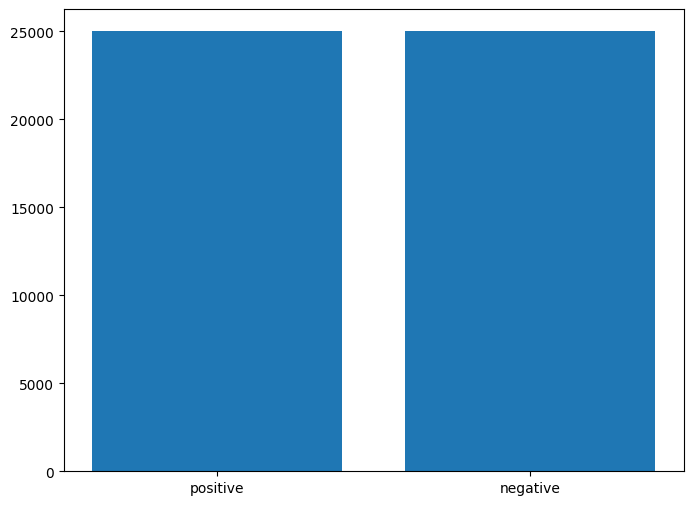

In [3]:
plt.figure(figsize=(8,6))
plt.bar(data['sentiment'].unique(),height=data['sentiment'].value_counts())
plt.show()

preprocessing

In [2]:
import re

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import string

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
def convert(text):

    text=text.lower()

    pattern='<[^>]+>'
    text=re.sub(pattern,'',text)

    pattern='http\S+|www\S+'
    text=re.sub(pattern,'',text)

    tokenize=word_tokenize(text)

    tokenize=[word for word in tokenize if word not in stopwords.words('english') and word not in string.punctuation and word.isalpha()]

    return ' '.join(tokenize)


<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
C:\Users\dell\AppData\Local\Temp\ipykernel_1072\1516147365.py:8: SyntaxWarning: invalid escape sequence '\S'
  pattern='http\S+|www\S+'


In [ ]:
data['converted_review']=data['review'].apply(convert)

In [ ]:
data['sentiment']=data['sentiment'].map({'negative':0,'positive':1})

In [ ]:
data.to_csv('converted_data_IMDB.csv',index=False)

In [ ]:
df=pd.read_csv('converted_data_IMDB.zip')

df

,review,sentiment,converted_review
0,One of the other reviewers has mentioned that ...,1,one reviewers mentioned watching oz episode ho...
1,A wonderful little production. <br /><br />The...,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visually stunnin...
...,...,...,...
49995,I thought this movie did a down right good job...,1,thought movie right good job creative original...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,0,catholic taught parochial elementary schools n...
49998,I'm going to have to disagree with the previou...,0,going disagree previous comment side maltin on...


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense,Dropout

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [7]:
x=df['converted_review']
y=df['sentiment']

In [8]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42)
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [9]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(32000,)
(8000,)
(10000,)


In [11]:
tf_idf=TfidfVectorizer()
#tf_idf=TfidfVectorizer()

res_train=tf_idf.fit_transform(x_train)

res_test=tf_idf.fit_transform(x_test)

res_val=tf_idf.fit_transform(x_val)

In [12]:
print(res_train.shape)
print(res_test.shape)
print(res_val.shape)

(32000, 81955)
(8000, 45909)
(10000, 50392)


In [7]:
tf_idf=TfidfVectorizer(max_features=10000)
#tf_idf=TfidfVectorizer()

res_train=tf_idf.fit_transform(x_train)

res_test=tf_idf.fit_transform(x_test)

res_val=tf_idf.fit_transform(x_val)

model building

In [9]:
model_NN=Sequential()


#input layer
model_NN.add(Dense(10000,'relu'))

#hidden layer
#model_NN.add(Dense(200,'relu'),Dropout())
model_NN.add(Dense(200,'relu'))

model_NN.add(Dense(100,'relu'))

#output layer
model_NN.add(Dense(1,'sigmoid'))


#configuration
model_NN.compile('adam','binary_crossentropy',metrics=['accuracy'])

model training

In [10]:
# training
history=model_NN.fit(res_train.toarray(),y_train,epochs=10,validation_data=(res_val.toarray(),y_val))

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1461s 1s/step - accuracy: 0.8626 - loss: 0.3177 - val_accuracy: 0.5239 - val_loss: 1.1324
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1331s 1s/step - accuracy: 0.9463 - loss: 0.1432 - val_accuracy: 0.5323 - val_loss: 2.6832
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1841s 2s/step - accuracy: 0.9945 - loss: 0.0170 - val_accuracy: 0.5311 - val_loss: 6.8822
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1745s 2s/step - accuracy: 0.9998 - loss: 0.0013 - val_accuracy: 0.5292 - val_loss: 10.7785
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1331s 1s/step - accuracy: 0.9998 - loss: 0.0022 - val_accuracy: 0.5326 - val_loss: 8.9970
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1323s 1s/step - accuracy: 1.0000 - loss: 2.2163e-05 - val_accuracy: 0.5298 - val_loss: 11.1233
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1326s 1s/step - accuracy: 1.0000 - loss: 1.5084e-06 - val_accuracy: 0.5313 - val_loss: 11.3746
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1316s 1s/step - accurac

# drop out

In [11]:
model_NN=Sequential()


#input layer
model_NN.add(Dense(10000,'relu'))

#hidden layer
model_NN.add(Dense(200,'relu'),Dropout(0.5))
#model_NN.add(Dense(200,'relu'))

model_NN.add(Dense(100,'relu',Dropout(0.1)))

#output layer
model_NN.add(Dense(1,'sigmoid'))


#configuration
model_NN.compile('adam','binary_crossentropy',metrics=['accuracy'])

In [12]:
history=model_NN.fit(res_train.toarray(),y_train,epochs=5,validation_data=(res_val.toarray(),y_val))

Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1368s 1s/step - accuracy: 0.8643 - loss: 0.3181 - val_accuracy: 0.5245 - val_loss: 1.0975
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1342s 1s/step - accuracy: 0.9479 - loss: 0.1396 - val_accuracy: 0.5282 - val_loss: 2.4298
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1336s 1s/step - accuracy: 0.9949 - loss: 0.0158 - val_accuracy: 0.5291 - val_loss: 6.6463
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1338s 1s/step - accuracy: 0.9996 - loss: 0.0017 - val_accuracy: 0.5321 - val_loss: 10.2749
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1324s 1s/step - accuracy: 1.0000 - loss: 2.3871e-04 - val_accuracy: 0.5283 - val_loss: 10.4687


# regularization

In [13]:
from keras.regularizers import l1,l2,l1_l2

In [16]:
model_NN=Sequential()


#input layer
model_NN.add(Dense(10000,'relu'))

#hidden layer
model_NN.add(Dense(200,'relu',kernel_regularizer=l1(0.5)))

model_NN.add(Dense(100,'relu',kernel_regularizer=l1(0.1)))

#output layer
model_NN.add(Dense(1,'sigmoid'))


#configuration
model_NN.compile('adam','binary_crossentropy',metrics=['accuracy'])

In [17]:
history=model_NN.fit(res_train.toarray(),y_train,epochs=5,validation_data=(res_val.toarray(),y_val))

Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1611s 1s/step - accuracy: 0.5006 - loss: 260.6679 - val_accuracy: 0.4961 - val_loss: 124.5665
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1327s 1s/step - accuracy: 0.4986 - loss: 127.2444 - val_accuracy: 0.4961 - val_loss: 125.6262
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1336s 1s/step - accuracy: 0.5014 - loss: 127.2449 - val_accuracy: 0.4961 - val_loss: 125.3869
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1315s 1s/step - accuracy: 0.4991 - loss: 127.2384 - val_accuracy: 0.4961 - val_loss: 125.2384
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1342s 1s/step - accuracy: 0.4981 - loss: 127.2390 - val_accuracy: 0.4961 - val_loss: 126.2693


In [18]:
model_NN=Sequential()


#input layer
model_NN.add(Dense(10000,'relu'))

#hidden layer
model_NN.add(Dense(200,'relu',kernel_regularizer=l2(1.)))

model_NN.add(Dense(100,'relu',kernel_regularizer=l2(0.03)))

#output layer
model_NN.add(Dense(1,'sigmoid'))


#configuration
model_NN.compile('adam','binary_crossentropy',metrics=['accuracy'])

In [19]:
history=model_NN.fit(res_train.toarray(),y_train,epochs=5,validation_data=(res_val.toarray(),y_val))

Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1426s 1s/step - accuracy: 0.8149 - loss: 3.4537 - val_accuracy: 0.5147 - val_loss: 1.0004
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1401s 1s/step - accuracy: 0.9208 - loss: 0.2900 - val_accuracy: 0.5215 - val_loss: 1.2915
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1390s 1s/step - accuracy: 0.9444 - loss: 0.2281 - val_accuracy: 0.5253 - val_loss: 1.2228
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1491s 1s/step - accuracy: 0.9594 - loss: 0.1921 - val_accuracy: 0.5341 - val_loss: 1.5771
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1399s 1s/step - accuracy: 0.9721 - loss: 0.1577 - val_accuracy: 0.5309 - val_loss: 1.9920


In [ ]:
model_NN=Sequential()


#input layer
model_NN.add(Dense(10000,'relu'))

#hidden layer
model_NN.add(Dense(200,'relu',kernel_regularizer=l1_l2(1.2)))

model_NN.add(Dense(100,'relu',kernel_regularizer=l1_l2(1.)))

#output layer
model_NN.add(Dense(1,'sigmoid'))


#configuration
model_NN.compile('adam','binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model_NN.fit(res_train.toarray(),y_train,epochs=5,validation_data=(res_val.toarray(),y_val))

evaluation

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [22]:
loss, accuracy = model_NN.evaluate(res_test.toarray(),y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

250/250 ━━━━━━━━━━━━━━━━━━━━ 27s 99ms/step - accuracy: 0.5564 - loss: 1.8771
Test Loss: 1.8771190643310547
Test Accuracy: 0.5563750267028809


visualisation

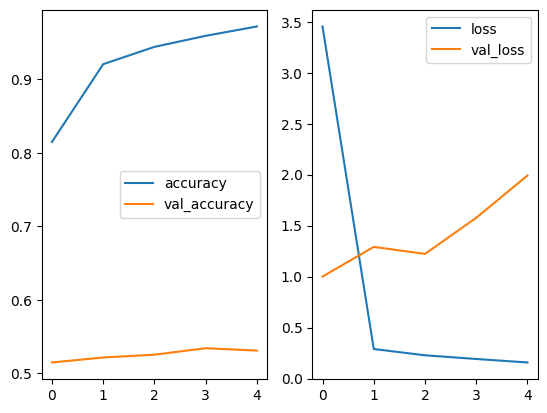

In [26]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [27]:
y_pred_=model_NN.predict(res_test)

250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step


Text(120.72222222222221, 0.5, 'actual values')

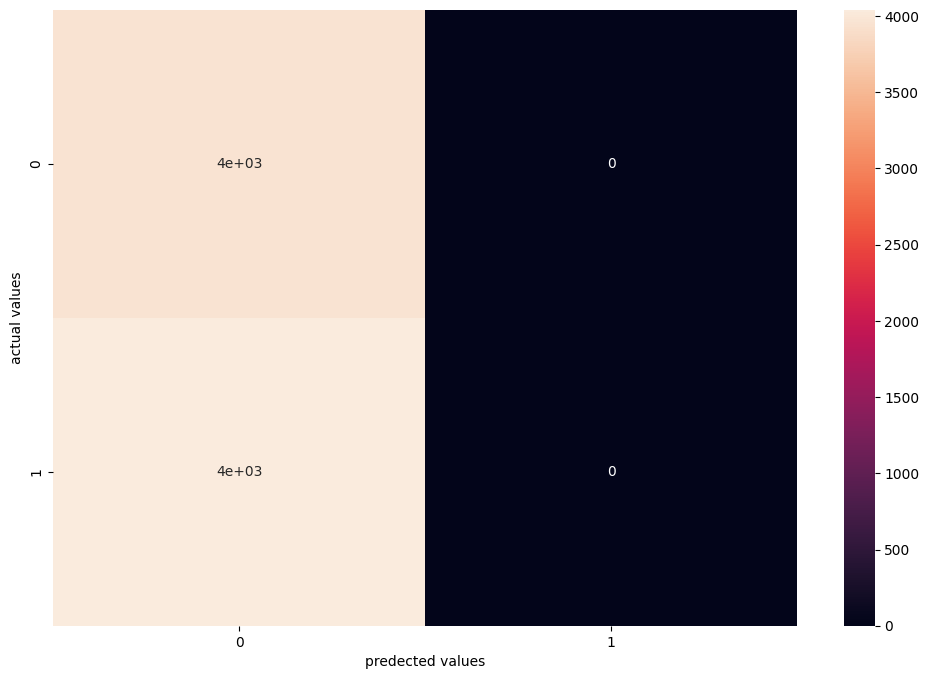

In [31]:
conf_matrix=confusion_matrix(y_test,y_pred_.argmax(axis=1))

plt.figure(figsize=(12,8))
sns.heatmap(conf_matrix,annot=True)
plt.xlabel('predected values')
plt.ylabel('actual values')

# **report**

## *Provide insights gained from the project*

## insights gained from the project, is that the dataset is balanced
## as well as, that datased is huge especially after using tf idf, since the features increased and vscode is memory stockage limited

## *Discuss any challenges faced and how they were overcome*

## thats why i decided to reduce the number of features (from 81955 to 10000)
## and before this option i used google colab but it behavies exactly same the RAM reach its limite while executing the program

## from the model training we see clearly that model is not predicting well validation data
## and as result we have an overfitting


## *Suggest potential improvements for the model or preprocessing steps*

## for this matter, i used dropout in dense layers as well as regularization (L1,L2,L1-L2)
## but still no progres was remarked

## in summary, even by reducing features number my computer was so slow in executing the program
## the best solution is to use platforms that provide GPU to execute the model and achieve an accurate conductions